In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle 
import numpy as np 
  
from sklearn.model_selection import train_test_split 
import sklearn.metrics as metrics 
from sklearn.linear_model import LogisticRegression 
import seaborn as sns 


In [4]:
import os  # Import the os module

# Change the working directory to the desired folder
os.chdir(r"C:\Users\shree\OneDrive\Desktop\Project_Exhibhition\Data")
print(os.getcwd())  # Confirm the new working directory

# Now you can load your file without specifying the full path
import pandas as pd
data = pd.read_csv("Crop_Recommendation.csv")
print(data.head())  # Display the first few rows of the DataFrame

C:\Users\shree\OneDrive\Desktop\Project_Exhibhition\Data
   Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     Rainfall  Crop  
0  202.935536  Rice  
1  226.655537  Rice  
2  263.964248  Rice  
3  242.864034  Rice  
4  262.717340  Rice  


In [5]:
# Return the first five rows of CSV file 
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [4]:
# Return information about the datatype, 
# NULL type of the columns of CSV file 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
# describe 
data.describe() 

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
print(data.columns)


Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')


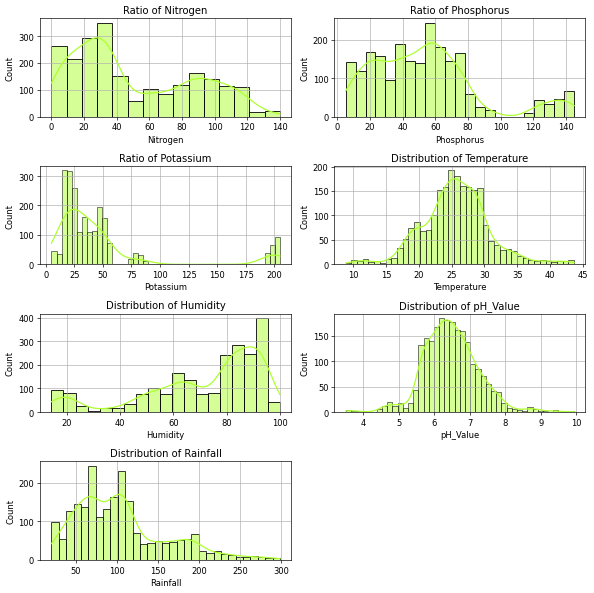

In [8]:
# Overall distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 60

# Corrected feature names to match column headings
features = ['Nitrogen', 'Phosphorus', 'Potassium', 
            'Temperature', 'Humidity', 'pH_Value', 'Rainfall']

for i, feat in enumerate(features): 
    plt.subplot(4, 2, i + 1) 
    sns.histplot(data[feat], kde=True, color='greenyellow')  # Updated from sns.distplot to sns.histplot
    if i < 3: 
        plt.title(f'Ratio of {feat}', fontsize=12) 
    else: 
        plt.title(f'Distribution of {feat}', fontsize=12) 
    plt.tight_layout() 
    plt.grid()


In [16]:
# Return the number of unique crops
unique_crops = data['Crop'].unique()
print("Unique Crops:", unique_crops)

# Return the count of each unique crop
crop_counts = data['Crop'].value_counts()
print("Crop Counts:\n", crop_counts)


Unique Crops: ['Rice' 'Maize' 'ChickPea' 'KidneyBeans' 'PigeonPeas' 'MothBeans'
 'MungBean' 'Blackgram' 'Lentil' 'Pomegranate' 'Banana' 'Mango' 'Grapes'
 'Watermelon' 'Muskmelon' 'Apple' 'Orange' 'Papaya' 'Coconut' 'Cotton'
 'Jute' 'Coffee']
Crop Counts:
 Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64


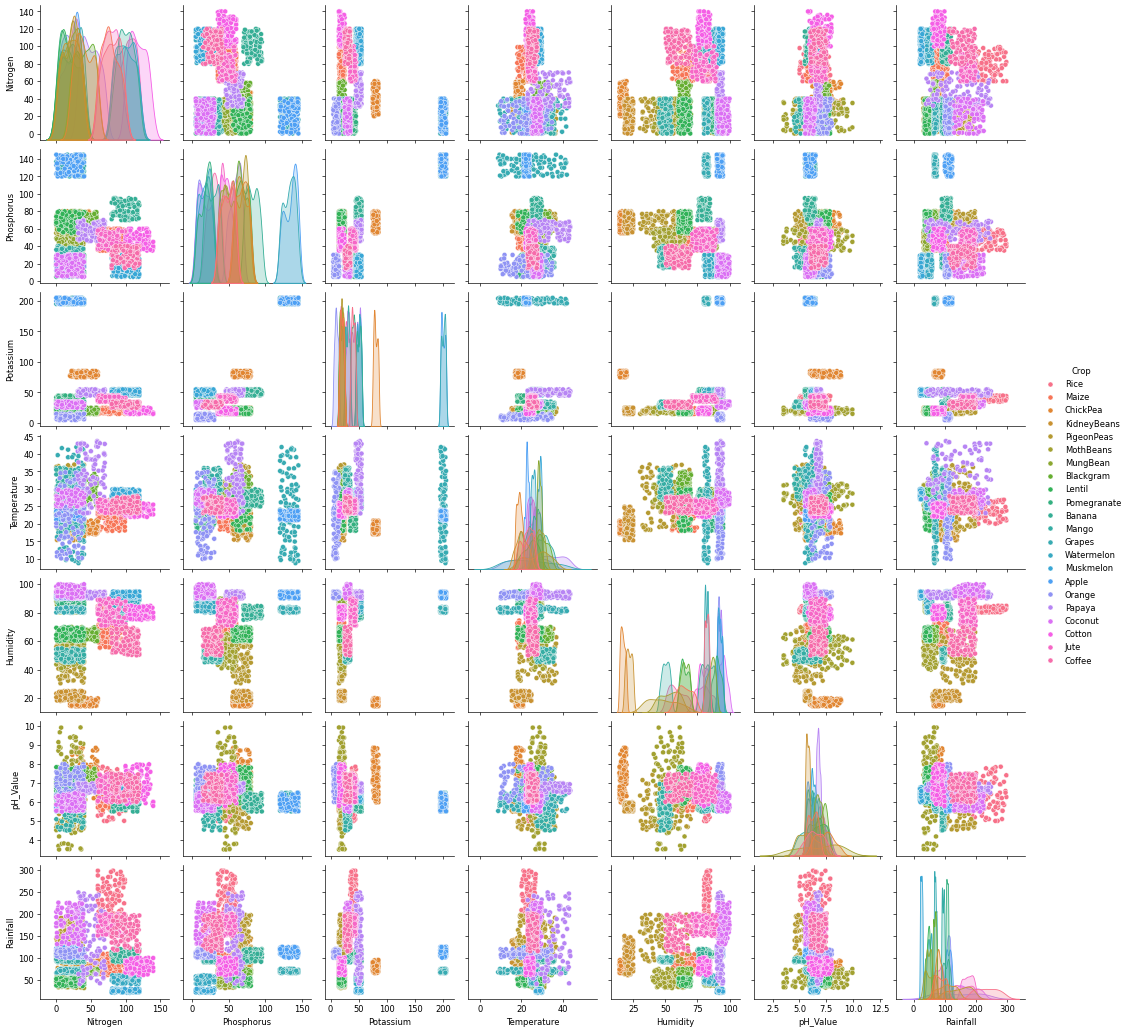

In [28]:
sns.pairplot(data, hue='Crop')


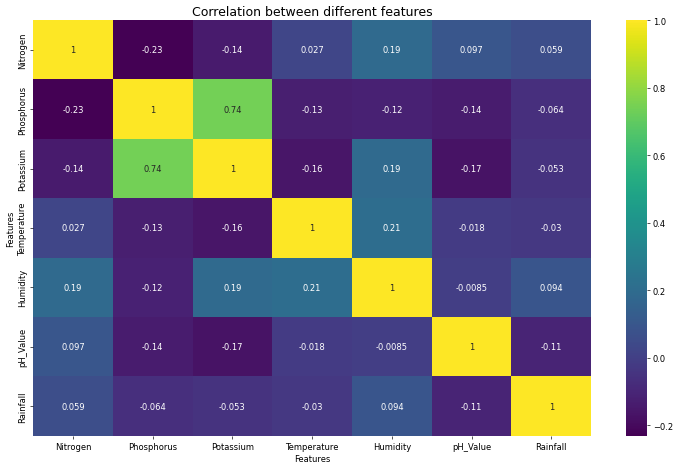

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(15, 9))

# Generate the correlation heatmap
sns.heatmap(data[['Nitrogen', 'Phosphorus', 'Potassium', 
                  'Temperature', 'Humidity', 'pH_Value', 
                  'Rainfall']].corr(), 
            annot=True, 
            cmap='viridis')

# Set axis labels
ax.set(xlabel='Features')
ax.set(ylabel='Features')

# Title
plt.title('Correlation between different features', 
          fontsize=15, 
          c='black')

plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Example data (replace with your own data)
# Assume `data` is a dataframe or 2D array with features, 
# and `target` is a 1D array or series with labels.

features = data.drop(columns=['Crop'])  # Features are everything except the target column
labels = data['Crop']  # Labels are the target column

# Split the data into features and labels
X_train, X_test, Y_train, Y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model with a higher number of iterations
model = LogisticRegression(max_iter=1000)

# Train the model on the scaled training data
model.fit(X_train_scaled, Y_train)

# Predict on the scaled test set
Y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print("Logistic Regression accuracy: ", accuracy)


Logistic Regression accuracy:  0.9636363636363636


In [14]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       0.90      0.95      0.93        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       1.00      1.00      1.00        27
      Coffee       0.94      1.00      0.97        17
      Cotton       0.94      1.00      0.97        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.83      0.87      0.85        23
 KidneyBeans       0.95      0.95      0.95        20
      Lentil       0.85      1.00      0.92        11
       Maize       1.00      0.95      0.98        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      0.92      0.96        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1.00        14
      Papaya       0.96    

In [15]:
import pickle

# Define the filename
filename = 'LogisticRegression.pkl'

# Save the trained logistic regression model using pickle
pickle.dump(model, open(filename, 'wb'))

# Confirmation message
print(f"Model saved to {filename}")


Model saved to LogisticRegression.pkl
